# Sentence VAE - Scratch Pad
The intention of this notebook is to gain further insight into SVAE code by deconstructing it into toy examples.

## Library Import

In [4]:
import numpy as np

### Boolean operation in feedforward

In [5]:
sent = np.array([10,4,2])
sos_idx = 4
pad_idx = 2
prob = np.random.rand(len(sent))

In [6]:
print(f'Initial prob {prob}')
prob[(sent - sos_idx) * (sent - pad_idx) == 0] = 1
print(f'Transformed prob {prob}')
print(f'sos_idx component {(sent-sos_idx)}')
print(f'pad_idx component {(sent-pad_idx)}')
print(f'both idx components {(sent - sos_idx) * (sent - pad_idx)}')

Initial prob [0.39846021 0.75306756 0.3649114 ]
Transformed prob [0.39846021 1.         1.        ]
sos_idx component [ 6  0 -2]
pad_idx component [8 2 0]
both idx components [48  0  0]


### Greedy Sampling
Within inference method

In [7]:
import torch

In [8]:
rand_tensor = torch.randn(size=(10,3))

In [9]:
def _sample(dist, mode='greedy'):
    """ 
    Greedy sampling algorithm: Greedily returns argmax of tensor based on logits
    """
    print(f'Input sequence:\n {dist}')
    if mode == 'greedy':
        _, sample = torch.topk(dist, 1, dim=-1)
    sample = sample.reshape(-1)

    return sample

In [10]:
_sample(rand_tensor)

Input sequence:
 tensor([[-0.3074, -0.0924, -0.8730],
        [ 0.9915,  1.2629, -0.1956],
        [-1.5238, -0.0903,  0.7500],
        [-0.6692,  0.8578, -0.3817],
        [-0.2228, -1.1577, -1.3455],
        [-1.0497,  0.4658, -2.1707],
        [ 1.7036,  0.3899,  0.2124],
        [-2.1532,  0.8691,  0.1331],
        [ 0.2165, -0.1620, -0.2821],
        [ 0.8283,  0.0305, -0.7849]])


tensor([1, 1, 2, 1, 0, 1, 0, 1, 0, 0])

## Kullback-Liebler Annealing Function

In [14]:
import matplotlib.pyplot as plt

In [11]:
def kl_anneal_function(anneal_function, step, k, x0):
    """ Anneals KL term at training time 
    
    Bowman et al. 2016
    """
    if anneal_function == 'logistic':
        return float(1/(1 + np.exp(-k*(step-x0))))
    
    elif anneal_function == 'linear':
        return min(1, step/x0)

In [53]:
k = 0.05
steps = 500
output_hist = []
for step in range(1, steps+1):
    output = kl_anneal_function("logistic", step=step, k=k, x0=250)
#     print(f'Step {step} - KL annealing factor: {k}')
    output_hist.append(output)

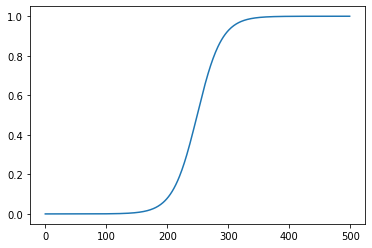

In [54]:
plt.plot(output_hist)